# Project Statement
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?
HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.
Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.
Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.



In [8]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [10]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [11]:
df.shape

(1470, 35)

# 2) check data type of each column

In [12]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

There are some catagorical columns Needs to perform encoding technique

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

what we observed up to 
 No Null values are present in the data set
 only int and obj data we have

In [14]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [15]:
#  check  the duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [16]:
df1=df.dropna()

In [17]:
print(df1.shape)
print(df.shape)

(1470, 35)
(1470, 35)


# Drop Unwanted column 

In [18]:
df2=df1.drop(columns=['EmployeeCount', 'StandardHours','EmployeeNumber','Over18'], axis=1)

print(df2.shape),print(df1.shape),print(df.shape)

(1470, 31)
(1470, 35)
(1470, 35)


(None, None, None)

In [19]:
df2.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

# Age: Numerical Value , data type: int64

In [20]:
df['Age'].describe(include='all')

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

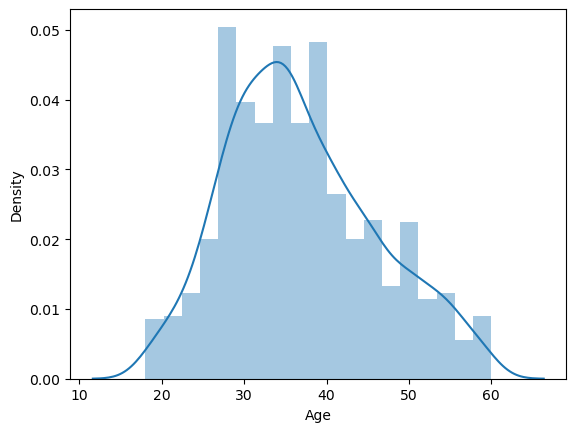

In [21]:
plt.plot()
sns.distplot(df['Age']) #distrubution plot to check the skewness 
plt.show()

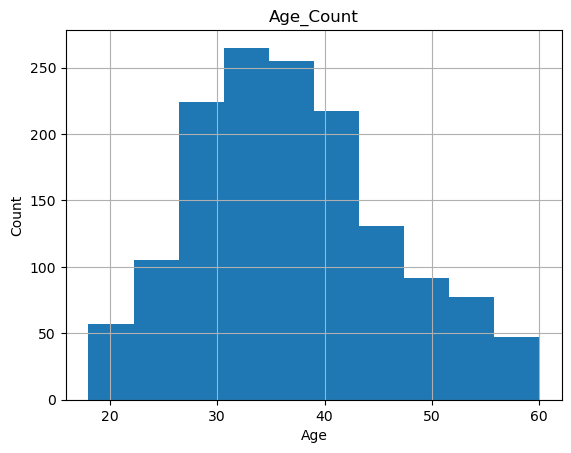

In [22]:
plt.plot()
df['Age'].hist(grid=True) #
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age_Count')
plt.show()

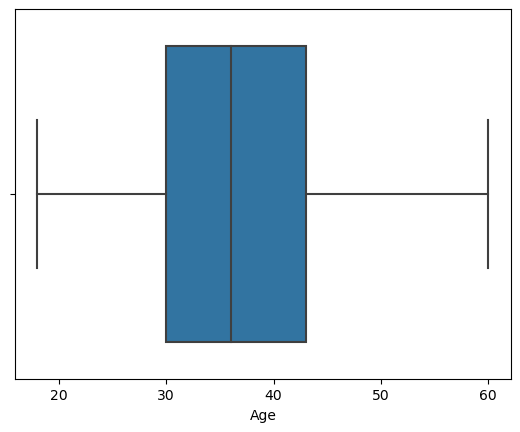

In [23]:
plt.plot()
sns.boxplot(df1['Age'])
plt.show()

<AxesSubplot:xlabel='Age', ylabel='count'>

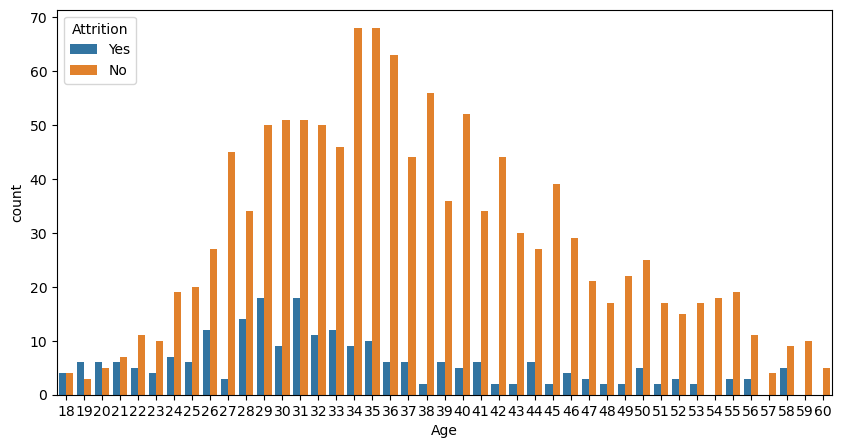

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Age", hue="Attrition",)

 Observation for Age column 
    Age column numeric value given in year
    
 Data type is int and its is normally distributed
 
 maximum number of people are from the age 30 to 40
 no outliers in age column 
 
 Emp attrition yes is maximum for Age between 26 to 33

Attrition : Employee leaving the company (0=no, 1=yes)|| Target variable|| datatype object||

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df2['Attrition']=le.fit_transform(df2['Attrition'])

In [26]:
df2['Attrition'].describe(include='all')

count    1470.000000
mean        0.161224
std         0.367863
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Attrition, dtype: float64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

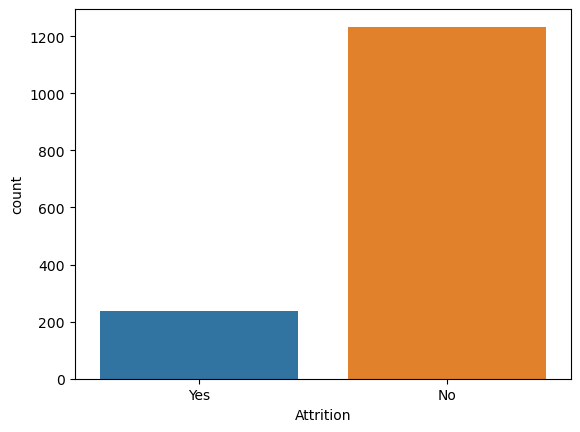

In [27]:
sns.countplot(data=df, x="Attrition" )

# Observation for Attrition column 
   there is problem of imbalanced dataset
 we need to fix this !!

# BusinessTravel: (1=No Travel, 2=Travel Frequently, 3=Tavel Rarely)|| datatype: object||

In [28]:
le=LabelEncoder()
df2['BusinessTravel']=le.fit_transform(df2['BusinessTravel'])

In [29]:
df2['BusinessTravel'].describe(include='all')

count    1470.000000
mean        1.607483
std         0.665455
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: BusinessTravel, dtype: float64

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

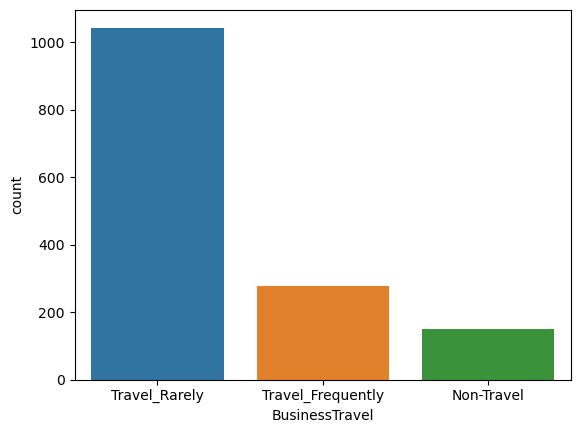

In [30]:
sns.countplot(data=df, x="BusinessTravel" )

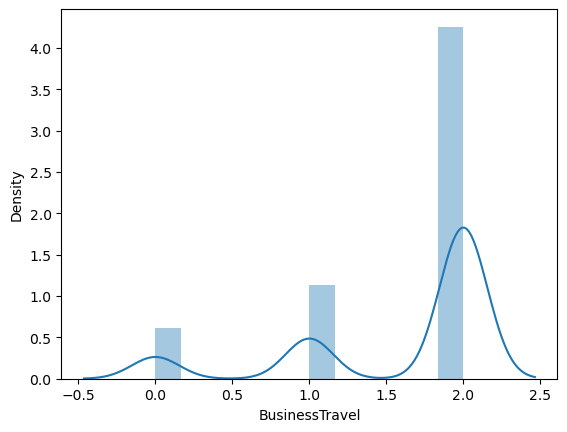

In [31]:
plt.plot()
sns.distplot(df2['BusinessTravel']) #distrubution plot to check the skewness 
plt.show()

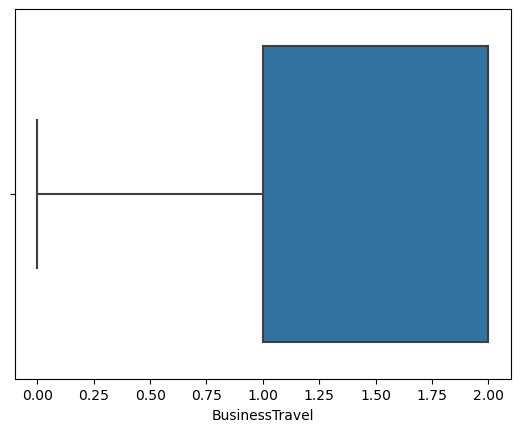

In [32]:
plt.plot()
sns.boxplot(df2['BusinessTravel'])
plt.show()

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

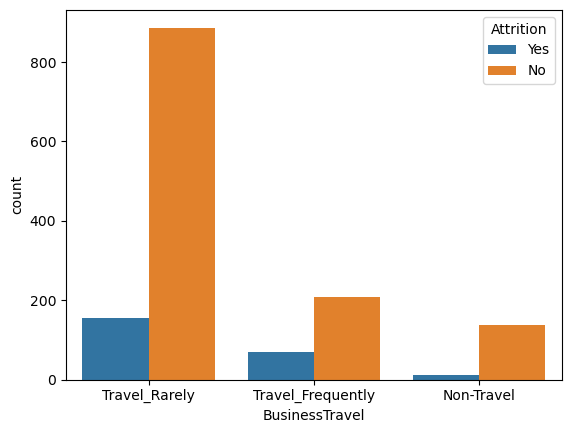

In [33]:
sns.countplot(data=df, x="BusinessTravel", hue="Attrition",)

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

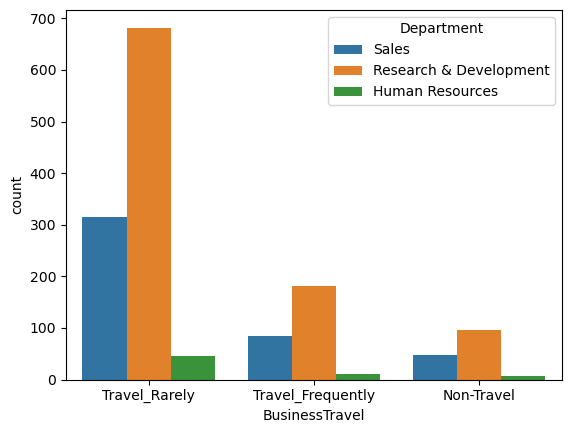

In [34]:
sns.countplot(data=df, x="BusinessTravel", hue="Department",)

# Observation for BusinessTravel column 1) maximum number of people who travels rarely<br>
 maximum number of people who travels rarely are from sales and R&D

# DailyRate Numerical Value - Salary Level || datatye int64 ||
        

In [35]:
df['DailyRate'].describe(include='all')

count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64

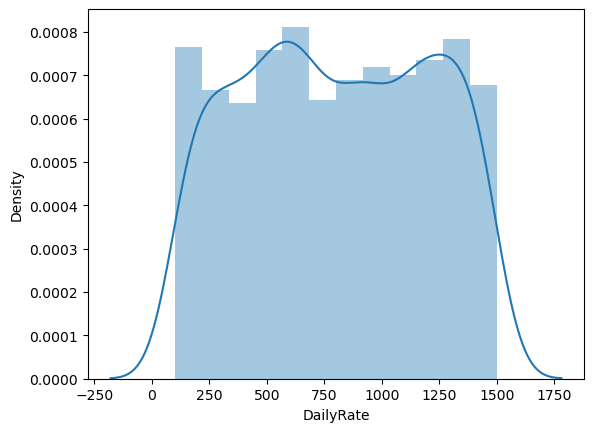

In [36]:
plt.plot()
sns.distplot(df['DailyRate']) #distrubution plot to check the skewness 
plt.show()

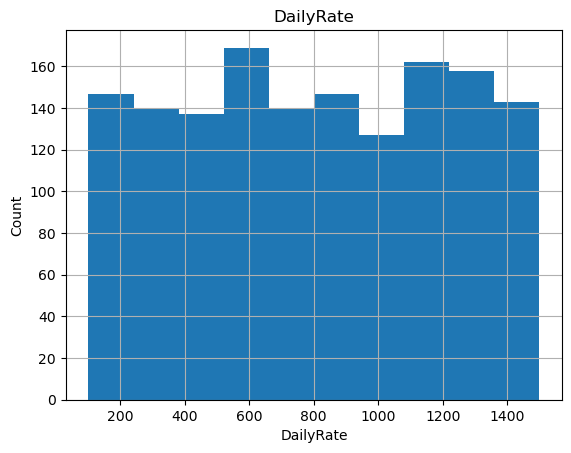

In [37]:
plt.plot()
df['DailyRate'].hist(grid=True) #
plt.xlabel('DailyRate')
plt.ylabel('Count')
plt.title('DailyRate')
plt.show()

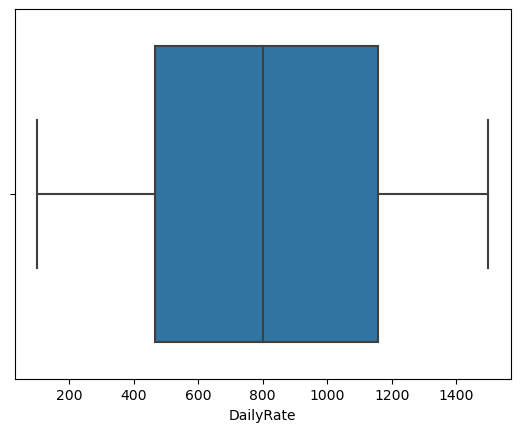

In [38]:
plt.plot()
sns.boxplot(df1['DailyRate'])
plt.show()

# Observation for DailyRate column
    No outliers 
noramlly normally distributed

 Department : (1=HR, 2=R&D, 3=Sales) || datatype: object||

In [39]:
le=LabelEncoder()
df2['Department']=le.fit_transform(df2['Department'])

In [40]:
df['Department'].describe(include='all')

count                       1470
unique                         3
top       Research & Development
freq                         961
Name: Department, dtype: object

<AxesSubplot:xlabel='Department', ylabel='count'>

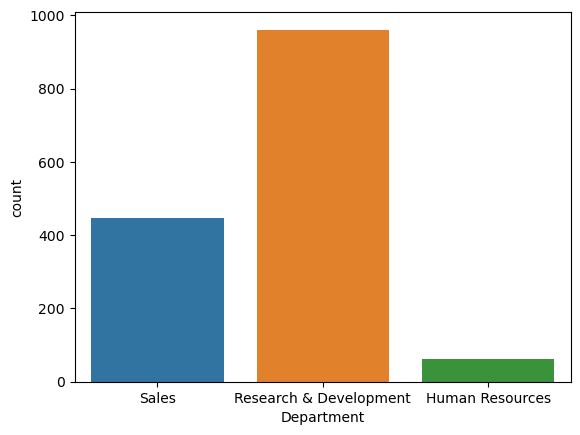

In [41]:
sns.countplot(data=df, x="Department", )

<AxesSubplot:xlabel='Department', ylabel='count'>

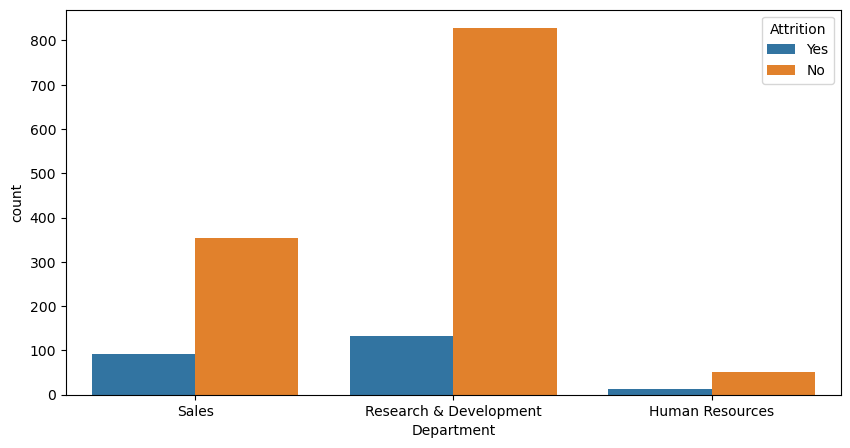

In [42]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Department", hue="Attrition",)

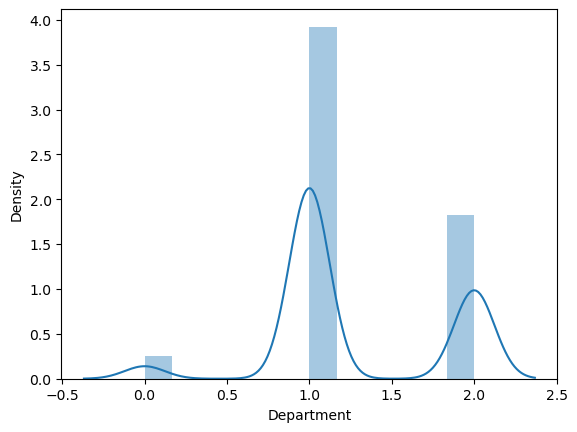

In [43]:
plt.plot()
sns.distplot(df2['Department']) #distrubution plot to check the skewness 
plt.show()

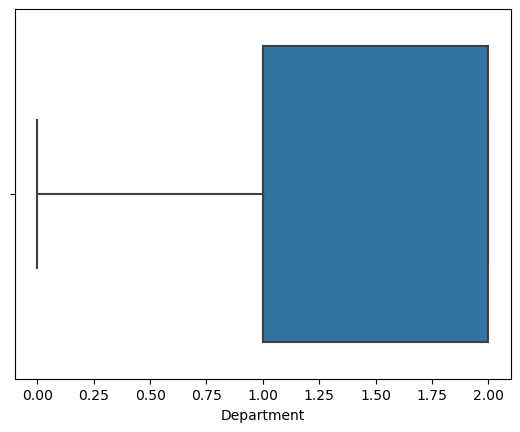

In [44]:
plt.plot()
sns.boxplot(df2['Department'])
plt.show()

# Observation for Department column
    maximum number of people come from R&D then followed by sales and other and same for the attrition 

# DistanceFromHome || datatype int64 || THE DISTANCE FROM OFFICE TO HOME

In [45]:
df['DistanceFromHome'].describe(include='all')

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

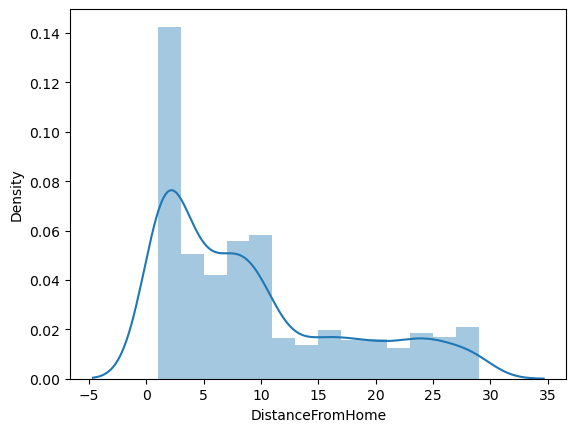

In [46]:
plt.plot()
sns.distplot(df['DistanceFromHome']) #distrubution plot to check the skewness 
plt.show()

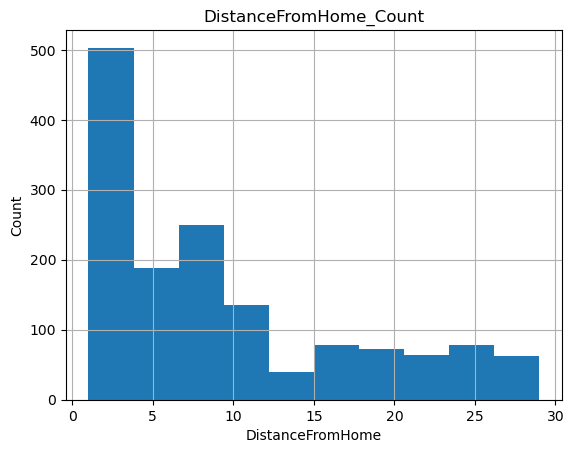

In [47]:
plt.plot()
df['DistanceFromHome'].hist(grid=True) #
plt.xlabel('DistanceFromHome')
plt.ylabel('Count')
plt.title('DistanceFromHome_Count')
plt.show()

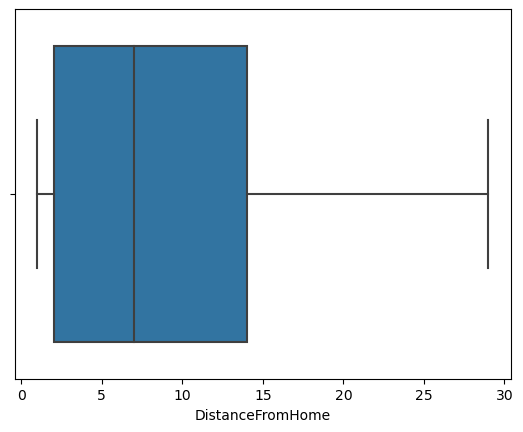

In [48]:
plt.plot()
sns.boxplot(df1['DistanceFromHome'])
plt.show()

# Observation for DistanceFromHome column 
some skewness is there 
no outliers 
maximum people who prefer to stay near about company

# Education || datatype int64 || 

In [49]:
df['Education'].describe(include='all')

count    1470.000000
mean        2.912925
std         1.024165
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Education, dtype: float64

<AxesSubplot:xlabel='Education', ylabel='count'>

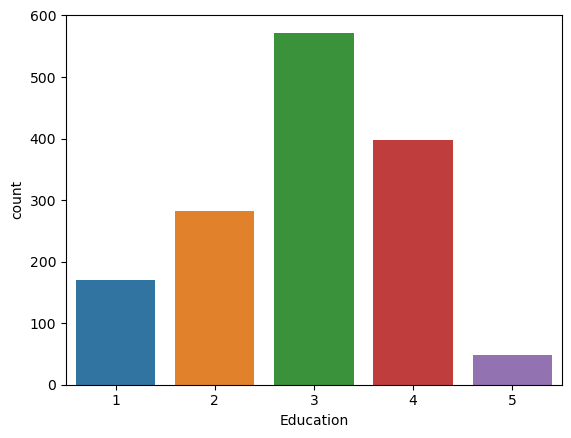

In [50]:
sns.countplot(data=df, x="Education", )

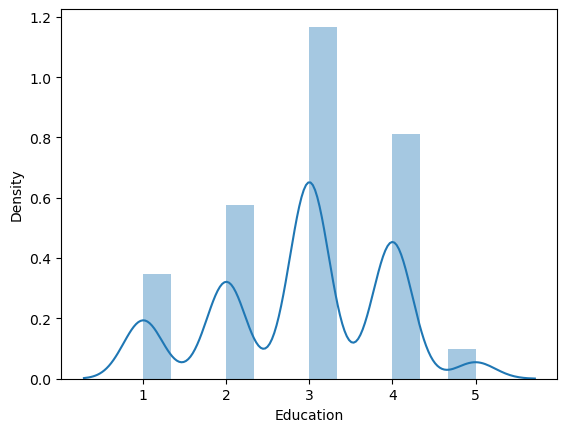

In [51]:
plt.plot()
sns.distplot(df['Education']) #distrubution plot to check the skewness 
plt.show()

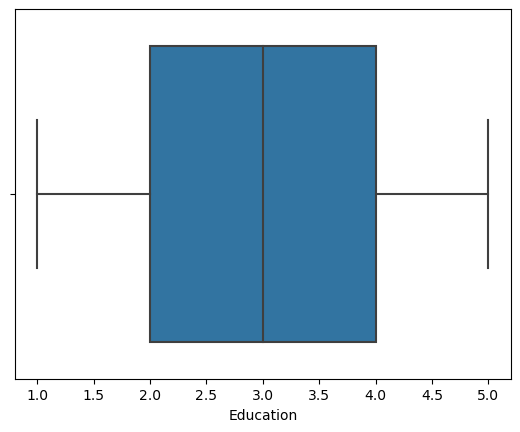

In [52]:
plt.plot()
sns.boxplot(df1['Education'])
plt.show()

<AxesSubplot:xlabel='Education', ylabel='count'>

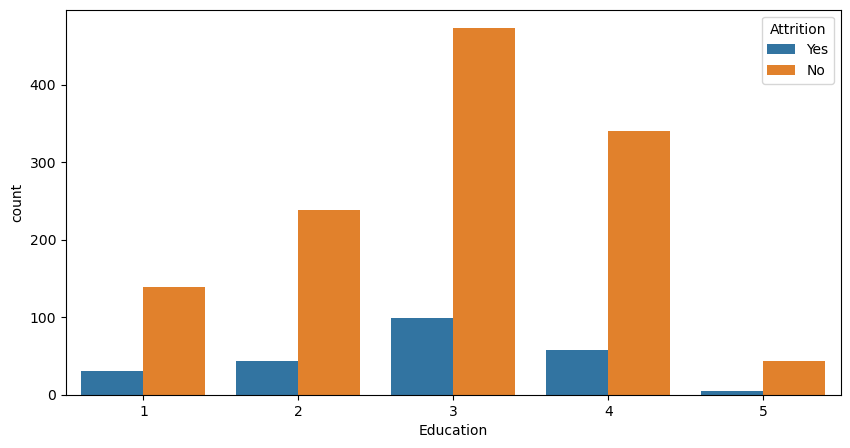

In [53]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Education", hue="Attrition",)

#  EducationField 

In [54]:
le=LabelEncoder()
df2['EducationField']=le.fit_transform(df2['EducationField'])

In [55]:
df['EducationField'].describe(include='all')

count              1470
unique                6
top       Life Sciences
freq                606
Name: EducationField, dtype: object

<AxesSubplot:xlabel='EducationField', ylabel='count'>

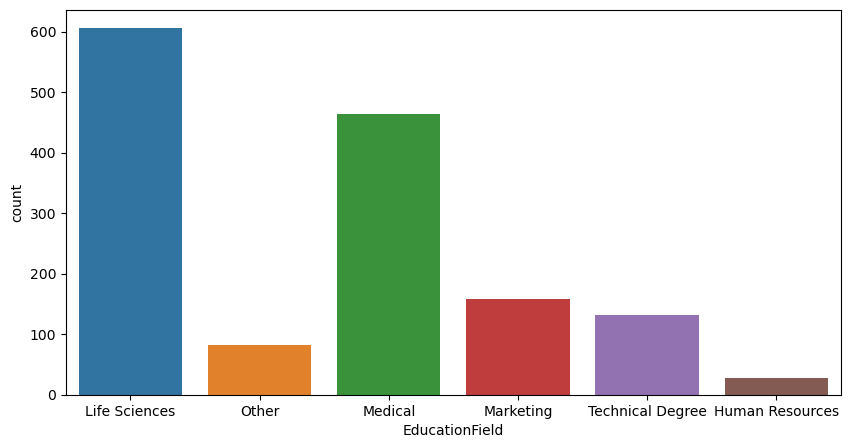

In [56]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="EducationField",)

In [57]:
df['EducationField'].describe(include='all')

count              1470
unique                6
top       Life Sciences
freq                606
Name: EducationField, dtype: object

<AxesSubplot:xlabel='EducationField', ylabel='count'>

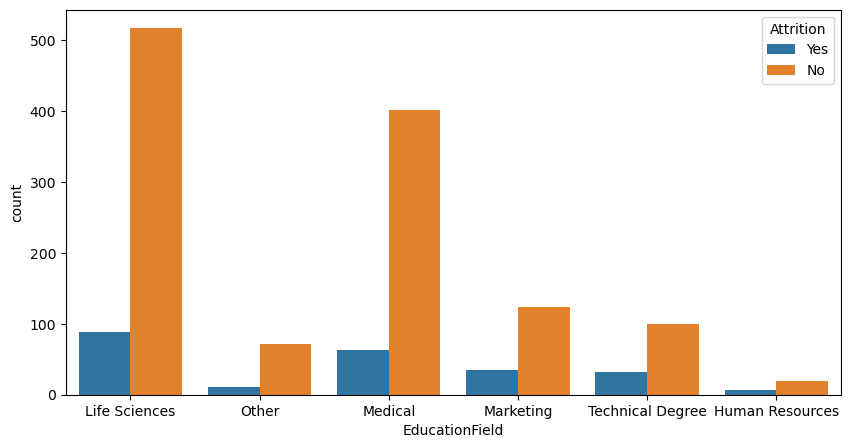

In [58]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="EducationField", hue="Attrition",)

# Observation for EducationField column maximum people who come from life science , medical and same for the attrition 

# EmployeeCount || datatype int64 
        EmployeeNumber            

# We dont have too much with this column  we can drop this 

# EnvironmentSatisfaction  datatye int || 

In [59]:
df['EnvironmentSatisfaction'].describe(include='all')

count    1470.000000
mean        2.721769
std         1.093082
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: EnvironmentSatisfaction, dtype: float64

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

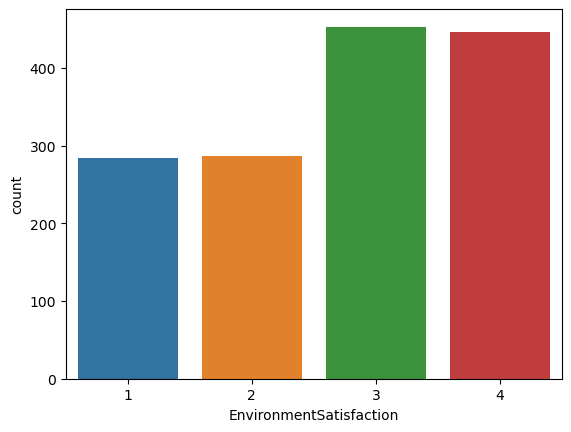

In [60]:
sns.countplot(data=df, x="EnvironmentSatisfaction", )

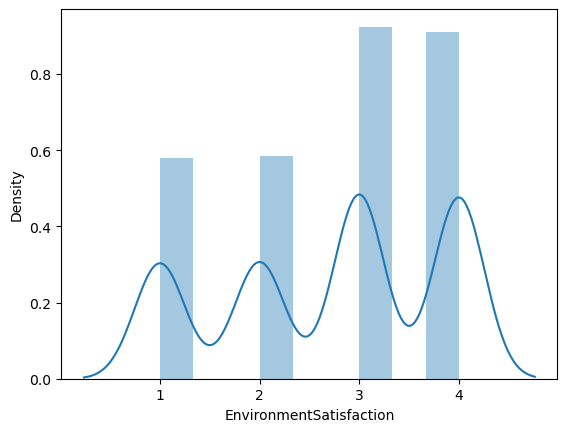

In [61]:
plt.plot()
sns.distplot(df['EnvironmentSatisfaction']) #distrubution plot to check the skewness 
plt.show()

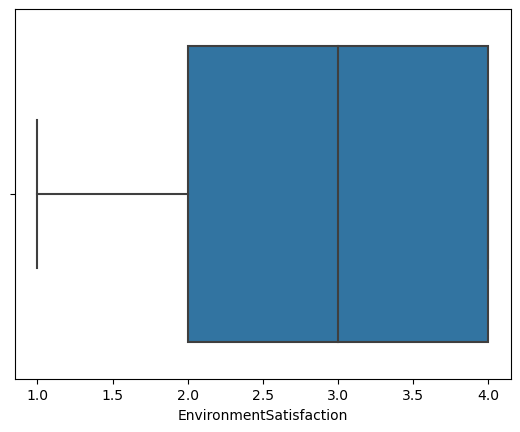

In [62]:
plt.plot()
sns.boxplot(df2['EnvironmentSatisfaction'])
plt.show()

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

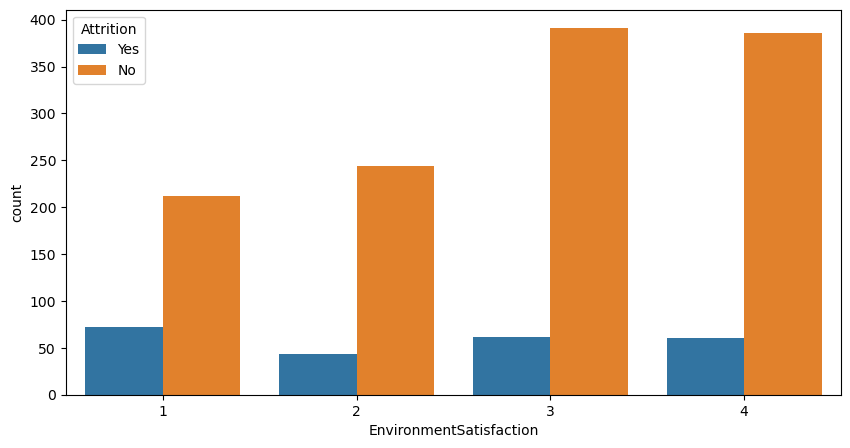

In [63]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="EnvironmentSatisfaction", hue="Attrition",)

Observations:
     60 % percent of people has voted for 3 and 4 

# Gender|| datatype object ||

In [64]:
df['Gender'].describe(include='all')

count     1470
unique       2
top       Male
freq       882
Name: Gender, dtype: object

In [65]:
df['Gender'].describe(include='all')

count     1470
unique       2
top       Male
freq       882
Name: Gender, dtype: object

<AxesSubplot:xlabel='Gender', ylabel='count'>

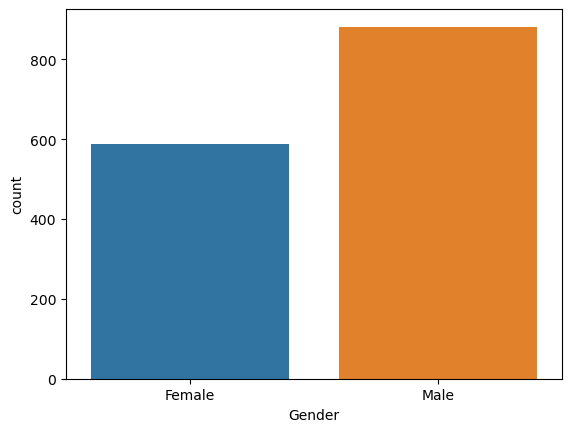

In [66]:
sns.countplot(data=df, x="Gender", )

<AxesSubplot:xlabel='Gender', ylabel='count'>

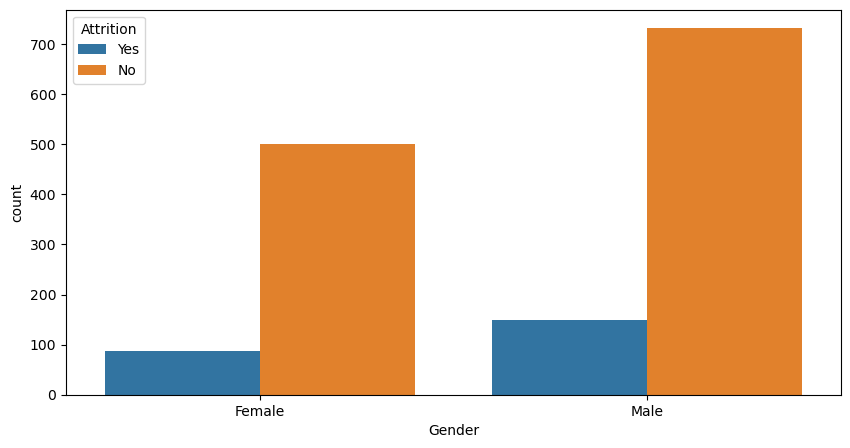

In [67]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Gender", hue="Attrition",)

In [68]:
# We can see that men are more in number than woman

# HourlyRate  datatype int

In [69]:
df['HourlyRate'].describe(include='all')

count    1470.000000
mean       65.891156
std        20.329428
min        30.000000
25%        48.000000
50%        66.000000
75%        83.750000
max       100.000000
Name: HourlyRate, dtype: float64

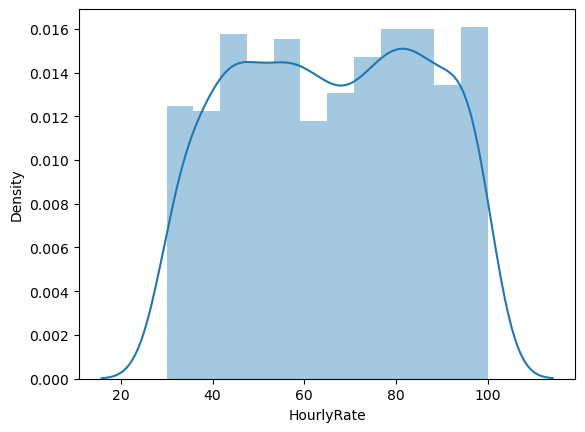

In [70]:
plt.plot()
sns.distplot(df['HourlyRate']) #distrubution plot to check the skewness 
plt.show()

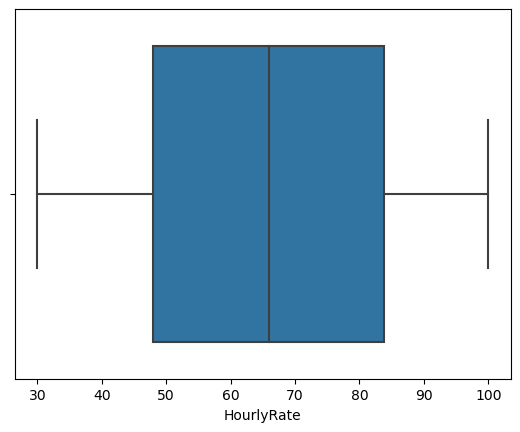

In [71]:
plt.plot()
sns.boxplot(df2['HourlyRate'])
plt.show()

# JOB INVOLVEMENT DATATYPE INT

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

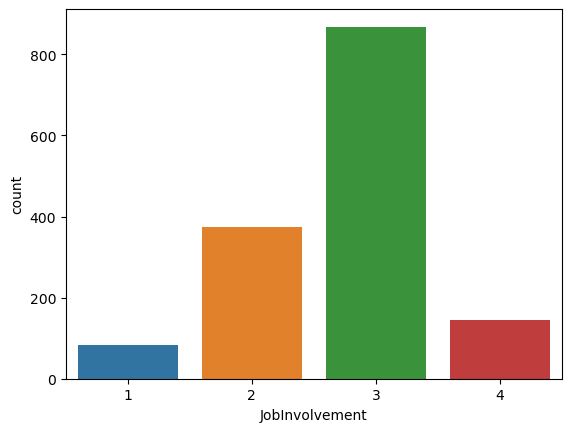

In [72]:
sns.countplot(data=df, x="JobInvolvement", )

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

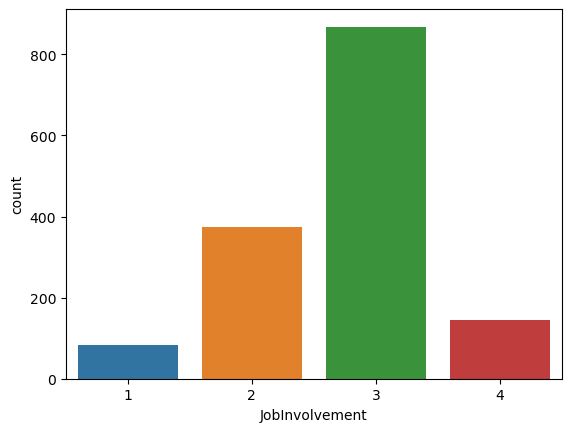

In [73]:
sns.countplot(data=df, x="JobInvolvement", )

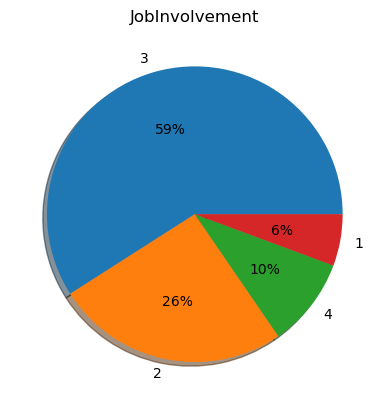

In [74]:
#pie chart
label=df['JobInvolvement'].unique()
y=df['JobInvolvement'].value_counts()
plt.title('JobInvolvement')
plt.pie(y,labels=label,autopct='%.0f%%',shadow=True)
plt.show()

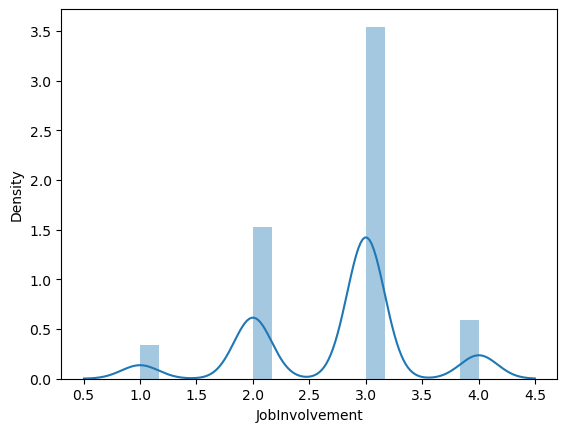

In [75]:
plt.plot()
sns.distplot(df['JobInvolvement']) #distrubution plot to check the skewness 
plt.show()

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

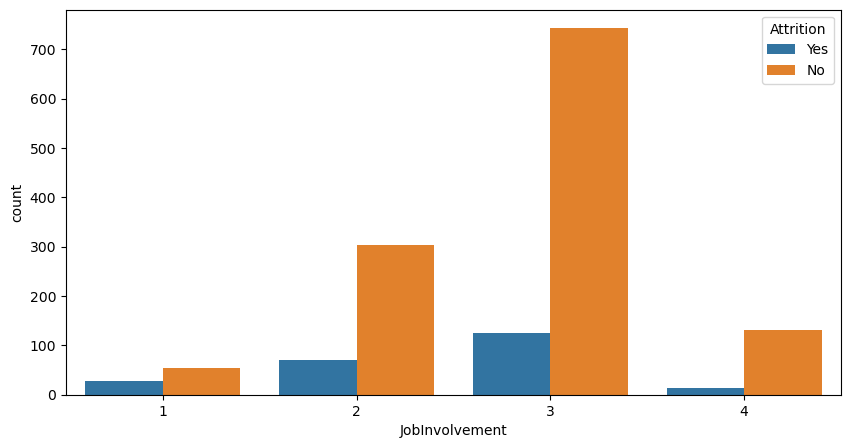

In [76]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="JobInvolvement", hue="Attrition",)

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

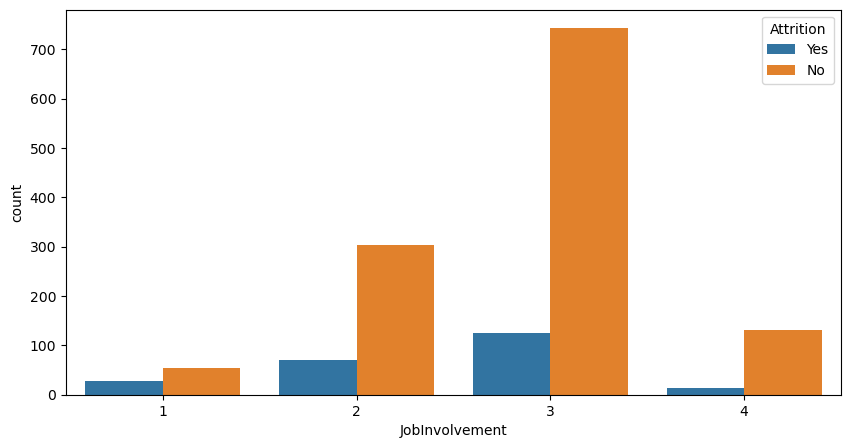

In [77]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="JobInvolvement", hue="Attrition",)

# JobRole datatype object

In [78]:
#checking unique
print(df['JobRole'].unique())
#count the unique values
print(df['JobRole'].value_counts())



['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


In [79]:
le=LabelEncoder()
df2['JobRole']=le.fit_transform(df2['JobRole'])

<AxesSubplot:xlabel='JobRole', ylabel='count'>

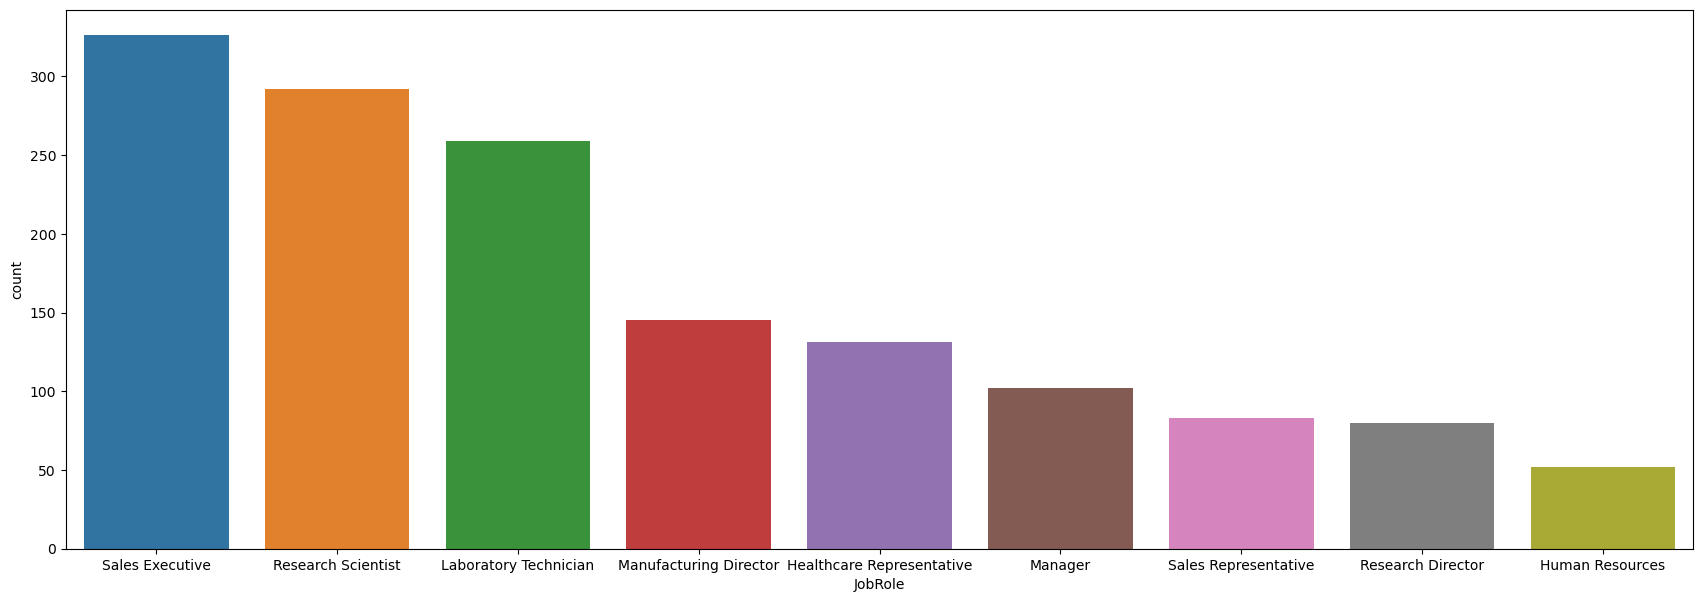

In [80]:
#count plot
plt.figure(figsize=(21,7))
sns.countplot(df['JobRole'])

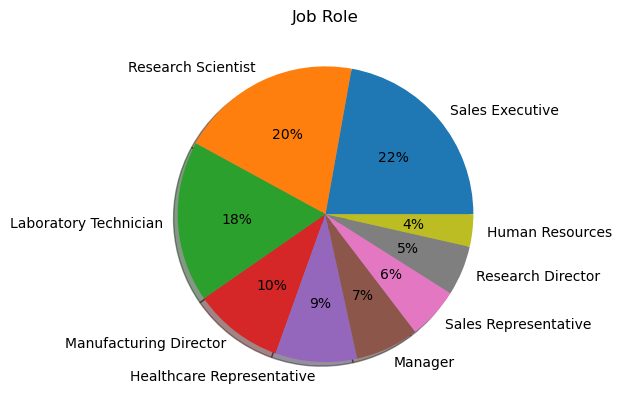

In [81]:
#pie chart
label=df['JobRole'].unique()
y=df['JobRole'].value_counts()


plt.title('Job Role')
plt.pie(y,labels=label,autopct='%.0f%%',shadow=True)
plt.show()

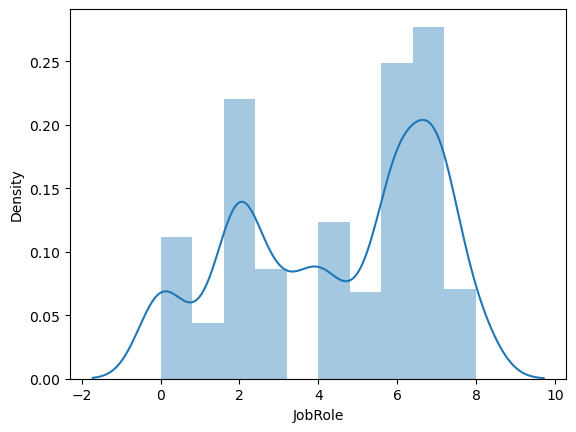

In [82]:
plt.plot()
sns.distplot(df2['JobRole']) #distrubution plot to check the skewness 
plt.show()

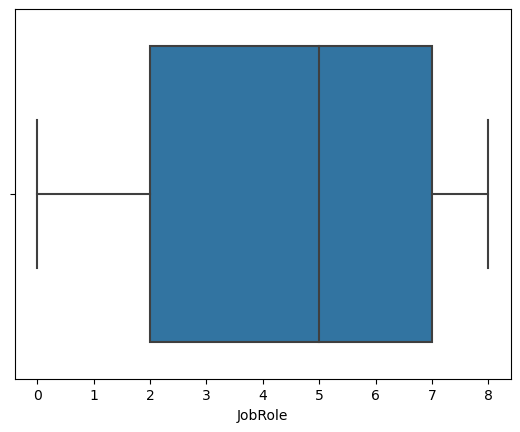

In [83]:
plt.plot()
sns.boxplot(df2['JobRole'])
plt.show()

<AxesSubplot:xlabel='JobRole', ylabel='count'>

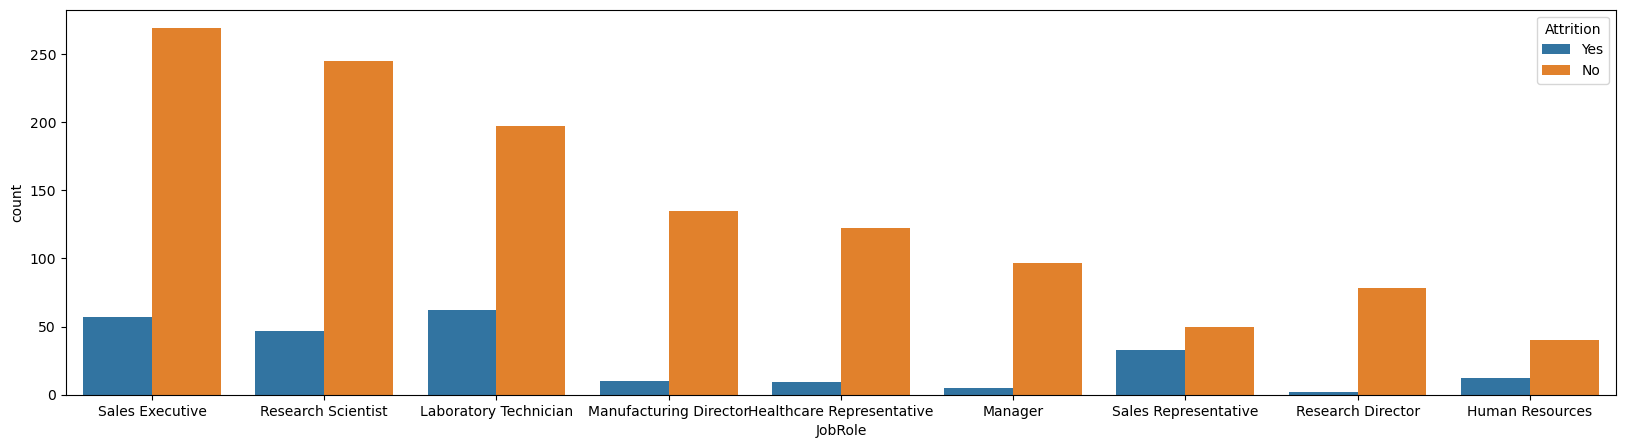

In [84]:
plt.figure(figsize=(20, 5))
sns.countplot(data=df, x="JobRole", hue="Attrition",)

In [85]:
#Most of the employees belongs to Sales Executive and Research Scientist category, and then Laboratory Technician

#  JobSatisfaction datatype int

In [86]:
df['JobSatisfaction'].describe(include='all')

count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

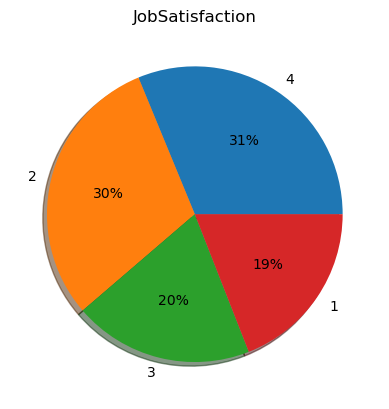

In [87]:
#pie chart
label=df['JobSatisfaction'].unique()
y=df['JobSatisfaction'].value_counts()


plt.title('JobSatisfaction')
plt.pie(y,labels=label,autopct='%.0f%%',shadow=True)
plt.show()

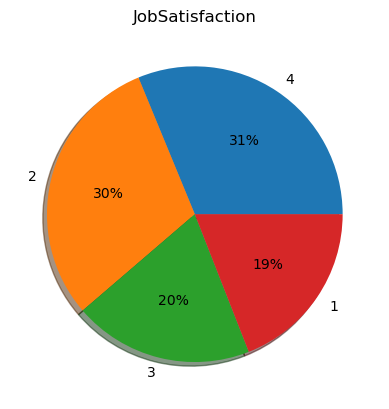

In [88]:
#pie chart
label=df['JobSatisfaction'].unique()
y=df['JobSatisfaction'].value_counts()


plt.title('JobSatisfaction')
plt.pie(y,labels=label,autopct='%.0f%%',shadow=True)
plt.show()

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

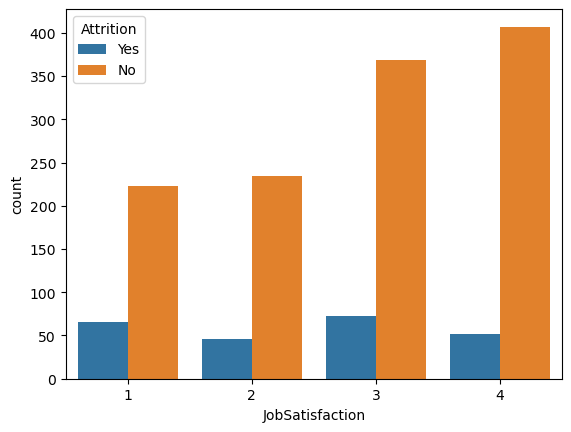

In [89]:
sns.countplot(data=df, x="JobSatisfaction", hue="Attrition",)

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

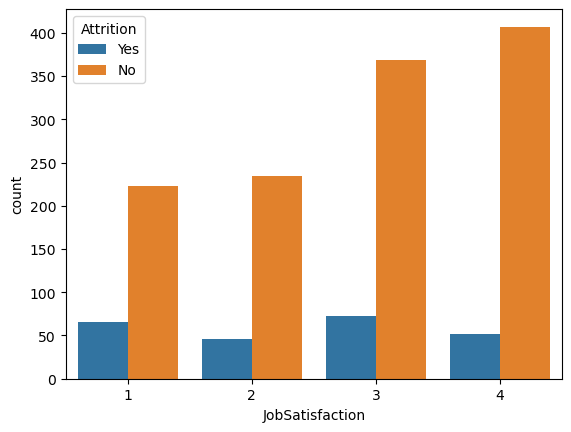

In [90]:
sns.countplot(data=df, x="JobSatisfaction", hue="Attrition",)

#   MaritalStatus

In [91]:
le=LabelEncoder()
df2['MaritalStatus']=le.fit_transform(df2['MaritalStatus'])

In [92]:
#checking unique
print(df['MaritalStatus'].unique())
#count the unique values
print(df['MaritalStatus'].value_counts())

['Single' 'Married' 'Divorced']
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


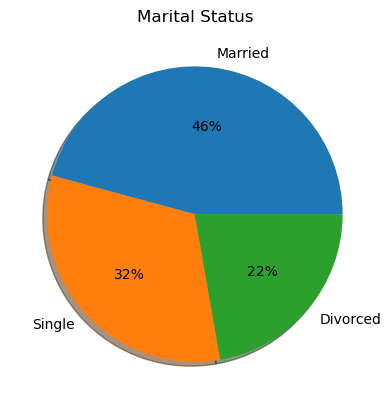

In [93]:
#pie chart
label=(['Married','Single','Divorced'])
y=df['MaritalStatus'].value_counts()

plt.title('Marital Status')
plt.pie(y,labels=label,autopct='%.0f%%',shadow=True)
plt.show()

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

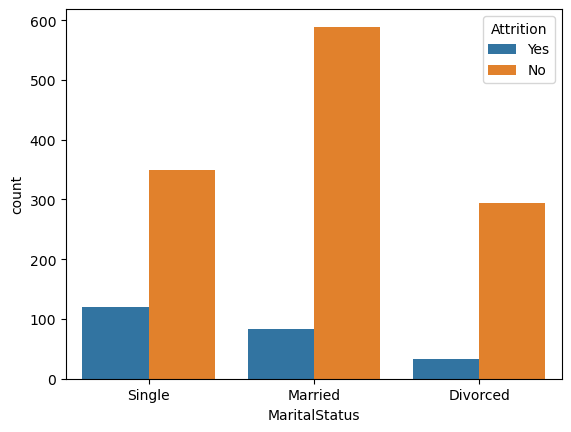

In [94]:
sns.countplot(data=df, x="MaritalStatus", hue="Attrition",)

# MonthlyIncome

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

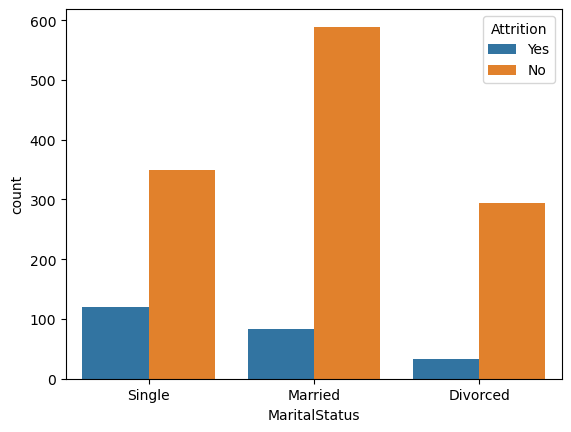

In [95]:
sns.countplot(data=df, x="MaritalStatus", hue="Attrition",)

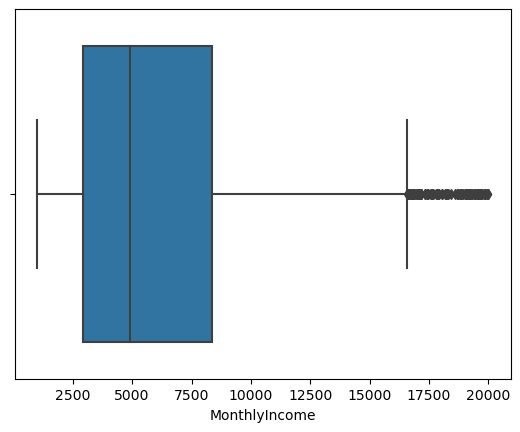

In [96]:
plt.plot()
sns.boxplot(df2['MonthlyIncome'])
plt.show()

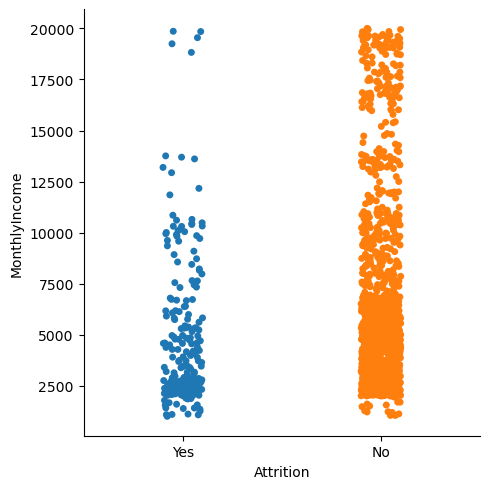

In [97]:
sns.catplot(x = 'Attrition', y = 'MonthlyIncome', data =df)
plt.show()

# Observation:
    . High attribute for emp whoes salary is less than 7500
    . Most of the employess are getting under 10k
    . There are outliers

# MonthlyRate

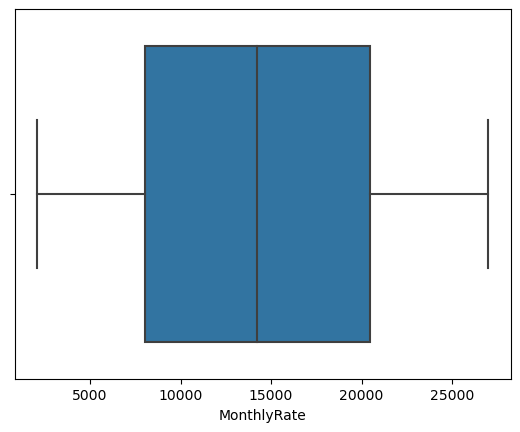

In [98]:
plt.plot()
sns.boxplot(df2['MonthlyRate'])
plt.show()

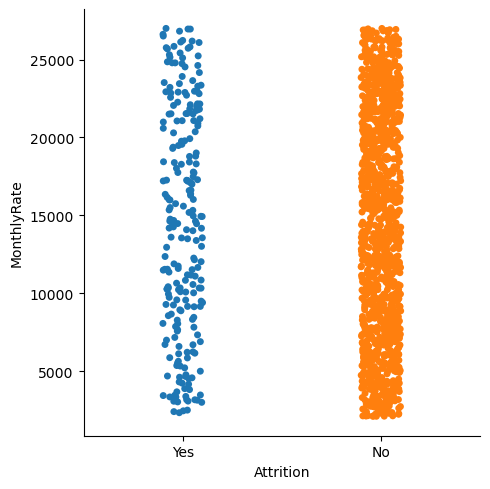

In [99]:
sns.catplot(x = 'Attrition', y = 'MonthlyRate', data =df)
plt.show()

# NUmCOmpaniesWorkded

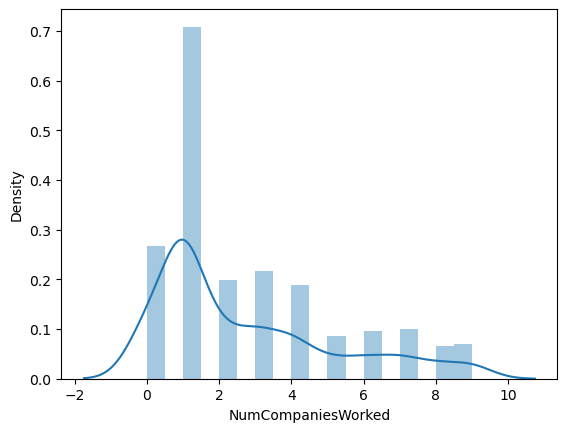

In [100]:
plt.plot()
sns.distplot(df['NumCompaniesWorked']) #distrubution plot to check the skewness 
plt.show()

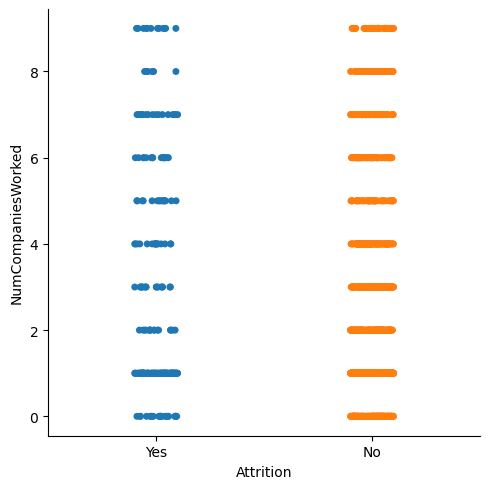

In [101]:
sns.catplot(x = 'Attrition', y = 'NumCompaniesWorked', data =df)
plt.show()

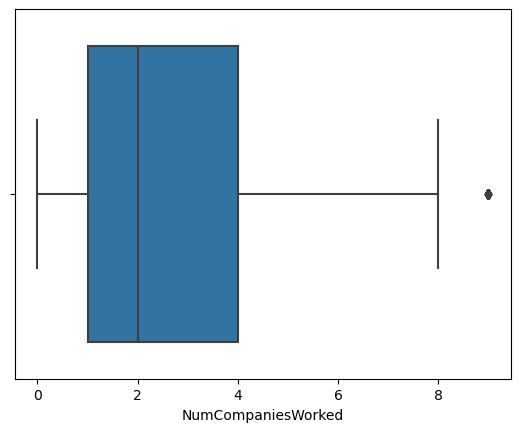

In [102]:
plt.plot()
sns.boxplot(df2['NumCompaniesWorked'])
plt.show()

# OverTime

In [103]:
le=LabelEncoder()
df2['OverTime']=le.fit_transform(df2['OverTime'])

In [104]:
df2['OverTime'].describe(include='all')

count    1470.000000
mean        0.282993
std         0.450606
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: OverTime, dtype: float64

<AxesSubplot:xlabel='OverTime', ylabel='count'>

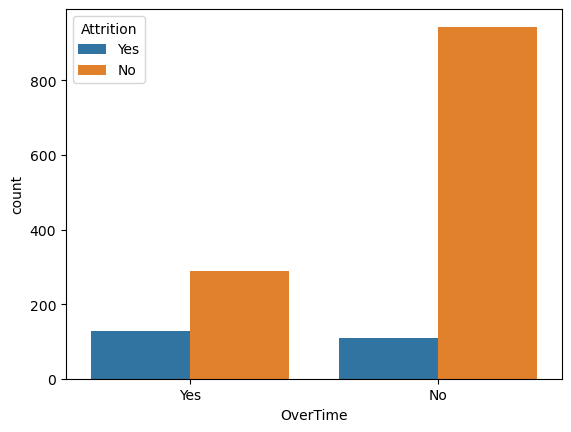

In [105]:
sns.countplot(data=df, x="OverTime", hue="Attrition",)

# PercentSalaryHike

In [106]:
df2['PercentSalaryHike'].describe(include='all')

count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

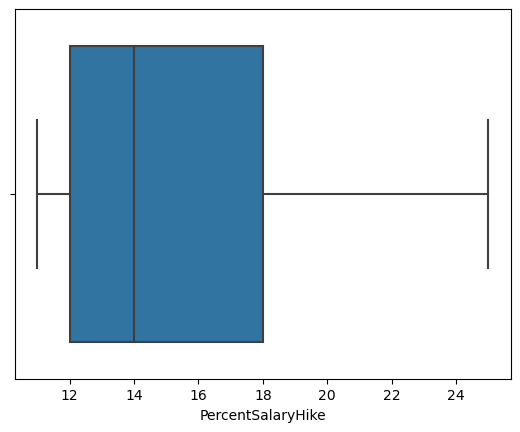

In [107]:
plt.plot()
sns.boxplot(df2['PercentSalaryHike'])
plt.show()

# visualizing outliers for all columns

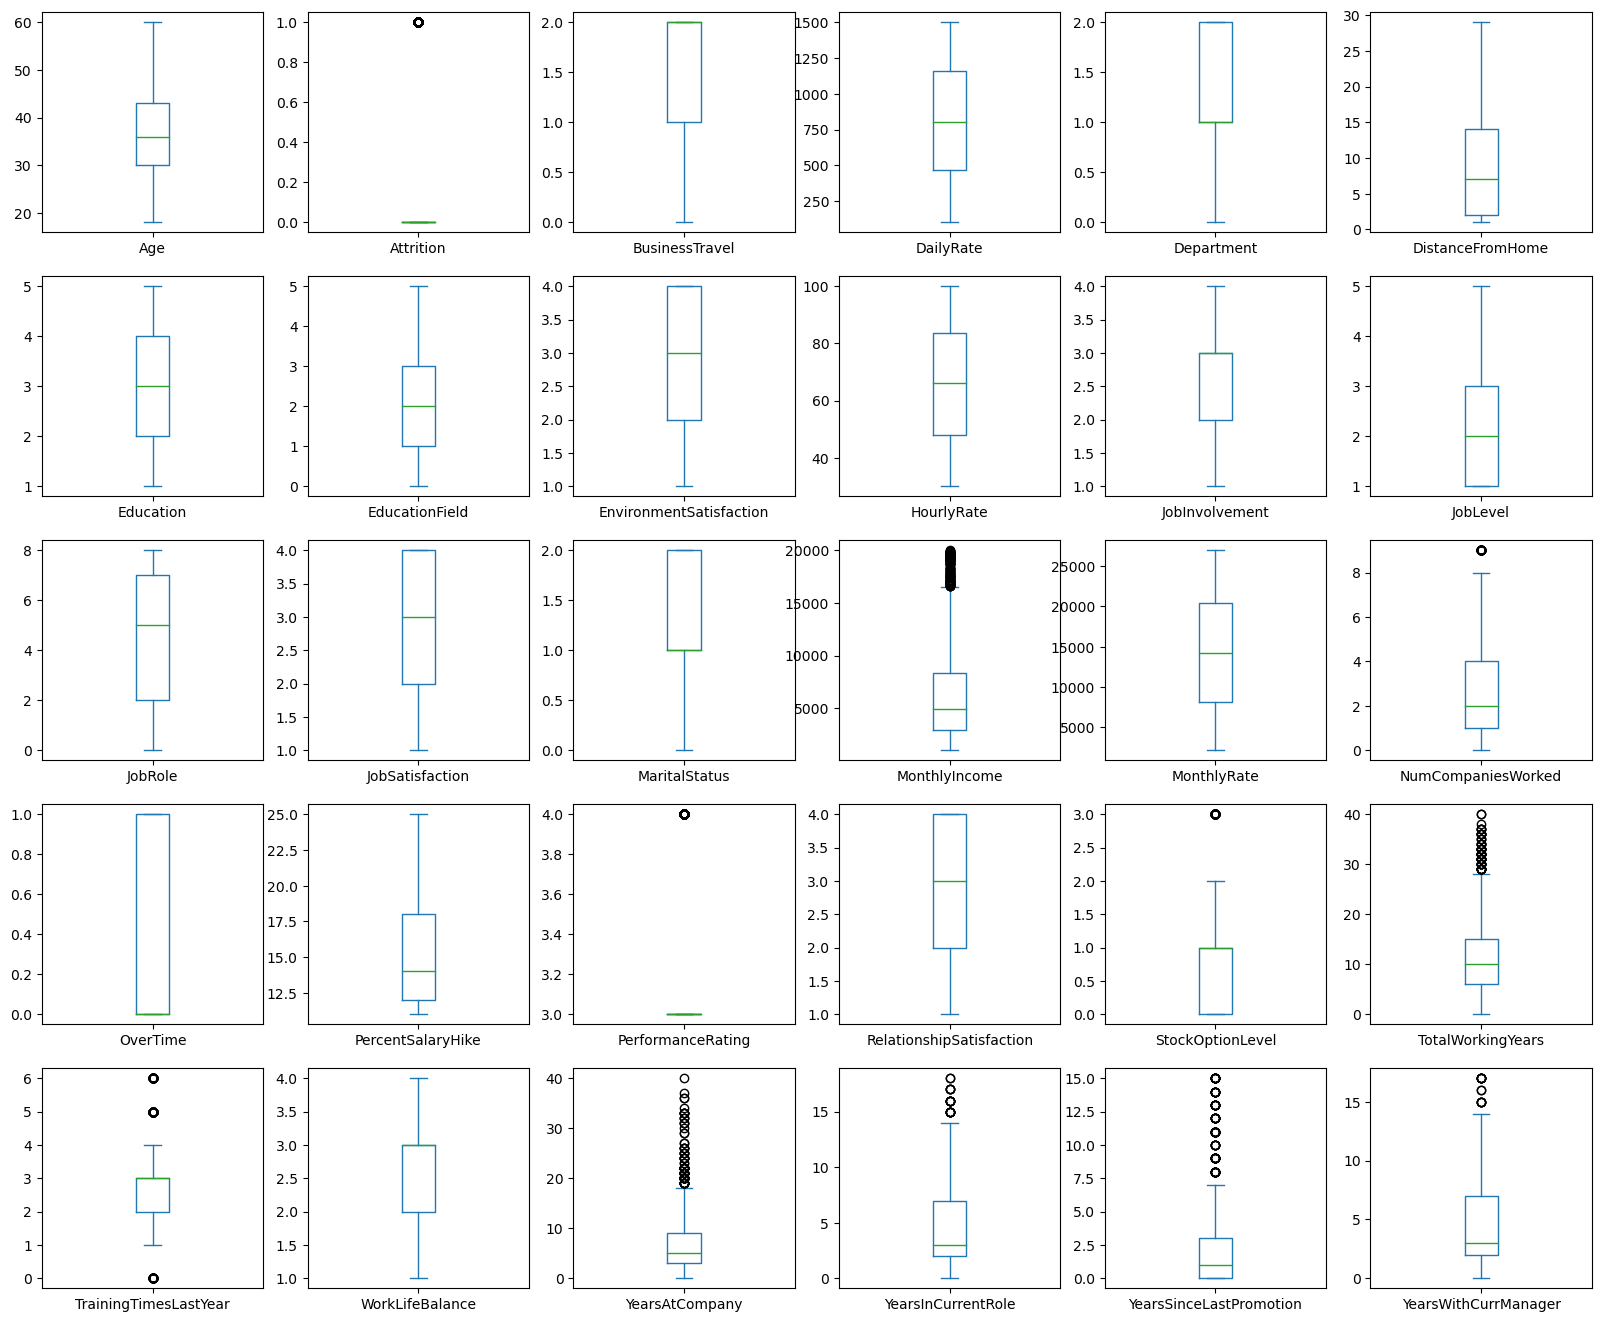

In [108]:
df2.plot(kind='box',subplots=True,layout=(6,6),figsize=(20,20))
plt.show()

# Removing Outliers

# Splitting the variables

In [109]:
only_f=df2.drop('Attrition',axis=1)
lbl =df2['Attrition']

# we need to balance the data set
 - Using the over sampling techniques for class imbalance

In [110]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [111]:
only_f = df2.drop('Attrition', axis=1)
lbl = df2['Attrition']


In [181]:
# Import the necessary library for one-hot encoding
from sklearn.preprocessing import OneHotEncoder

# Define which columns need to be one-hot encoded (categorical columns)
categorical_columns = only_f.select_dtypes(include=['object']).columns

# Perform one-hot encoding on the categorical columns
only_f_encoded = pd.get_dummies(only_f, columns=categorical_columns)

# Now, you can use the encoded DataFrame for SMOTE
train_x, train_y = smt.fit_resample(only_f_encoded, lbl)

In [183]:
#after Applying SMOTE
train_y.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

# Now Dataset is Balance

In [184]:
#make dataframe
df3=pd.DataFrame(train_x)

In [185]:
df3['Attrition']=train_y

In [186]:
#checking shape of dataset
df3.shape

(2466, 32)

In [187]:
from scipy.stats import zscore
z=np.abs(zscore(df3))
threshold=3
df4=df3[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df3.shape[0]-df4.shape[0])/df3.shape[0])

percentage of loss of data by zscore is : 0.10381184103811841


In [188]:
#Independent variables
x=df4.drop('Attrition',axis=1)

In [189]:
#Dependent variables
y=df4['Attrition']

In [190]:
x.skew()

Age                         0.581793
BusinessTravel             -0.958114
DailyRate                   0.093226
Department                  0.189279
DistanceFromHome            0.810489
Education                  -0.141037
EducationField              0.691772
EnvironmentSatisfaction     0.030922
HourlyRate                  0.024871
JobInvolvement             -0.290452
JobLevel                    1.010616
JobRole                    -0.350705
JobSatisfaction            -0.018114
MaritalStatus              -0.145878
MonthlyIncome               1.482165
MonthlyRate                 0.006837
NumCompaniesWorked          0.992102
OverTime                    1.041239
PercentSalaryHike           0.799425
PerformanceRating           2.676889
RelationshipSatisfaction   -0.024655
StockOptionLevel            1.033173
TotalWorkingYears           1.132334
TrainingTimesLastYear       0.578133
WorkLifeBalance            -0.398782
YearsAtCompany              1.370807
YearsInCurrentRole          0.873998
Y

In [191]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [192]:
scaler=MinMaxScaler(feature_range=(1,2))
power=PowerTransformer(method='box-cox')
pipeline=Pipeline(steps=[('s',scaler),('p',power)])

In [193]:
data=pipeline.fit_transform(x)

In [194]:
#make dataframe
x=pd.DataFrame(data,columns=x.columns)

In [195]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Female,Gender_Male
0,0.833310,0.818242,0.880177,1.553710,-1.481319,-0.779899,-0.902871,-0.363980,1.517268,0.649568,...,-0.794194,0.076771,-2.506659,-1.942718,0.497636,0.566409,-0.936687,0.861834,1.542467,-1.024740
1,1.564595,-1.020696,-1.354396,-0.311128,-0.001526,-1.774805,-0.902871,0.548560,-0.203250,-0.715881,...,1.140185,0.432951,0.431066,0.543991,1.250433,1.303119,0.172424,1.294653,-0.648312,0.975857
2,0.407792,0.818242,1.529231,-0.311128,-1.213048,-0.779899,1.406911,1.394053,1.416466,-0.715881,...,-0.794194,-0.121558,0.431066,0.543991,-1.792185,-1.363661,-0.936687,-1.301985,-0.648312,0.975857
3,-0.067557,-1.020696,1.573484,-0.311128,-0.967496,1.367748,-0.902871,1.394053,-0.476087,0.649568,...,-0.794194,0.076771,0.431066,0.543991,0.920871,1.303119,1.191953,-1.301985,1.542467,-1.024740
4,-0.896649,0.818242,-0.451457,-0.311128,-1.213048,-1.774805,0.856238,-1.368296,-1.375964,0.649568,...,1.140185,-0.335256,0.431066,0.543991,-0.790836,-0.200160,0.809698,-0.163131,-0.648312,0.975857


In [196]:
#after removing skewness
x.skew()

Age                         0.013477
BusinessTravel             -0.490028
DailyRate                  -0.033368
Department                  0.021584
DistanceFromHome            0.120673
Education                  -0.040650
EducationField              0.069391
EnvironmentSatisfaction    -0.068931
HourlyRate                 -0.045121
JobInvolvement             -0.042261
JobLevel                    0.279769
JobRole                    -0.174337
JobSatisfaction            -0.083288
MaritalStatus              -0.088885
MonthlyIncome               0.221544
MonthlyRate                -0.056805
NumCompaniesWorked          0.161125
OverTime                    1.041239
PercentSalaryHike           0.104060
PerformanceRating           2.676889
RelationshipSatisfaction   -0.079074
StockOptionLevel            0.496117
TotalWorkingYears           0.045038
TrainingTimesLastYear      -0.001768
WorkLifeBalance            -0.038463
YearsAtCompany              0.133053
YearsInCurrentRole          0.144393
Y

# VIF(Variance Inflation Factor)

In [197]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [198]:
def vif():
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    return vif

In [199]:
vif()

,Variables,VIF Factor
0,Age,2.031828
1,BusinessTravel,1.048539
2,DailyRate,1.039186
3,Department,2.360986
4,DistanceFromHome,1.046657
5,Education,1.102943
6,EducationField,1.077758
7,EnvironmentSatisfaction,1.117364
8,HourlyRate,1.030746
9,JobInvolvement,1.134000


In [200]:

# BusinessTravel variable and DailyRate as same VIF Factor so,drop DailyRate variable
x.drop('DailyRate',inplace=True,axis=1)

In [201]:
# DistanceFromHome and Education variables as Same VIF Factor so , drop Education variable
x.drop('Education',axis=1,inplace=True)

In [202]:
# EnvironmentSatisfaction and JobInvolvement as Same VIF Factor so, drop JobInvolvement variable
x.drop('JobInvolvement',axis=1,inplace=True)

In [203]:
# PercentSalaryHike and PerformanceRating variables as same VIF Factor so, drop PerformanceRating variable
x.drop('PerformanceRating',axis=1,inplace=True)

In [204]:
#Gender And HourlyRate variable has Same VIF Factor So, drop HourlyRate variable
x.drop('HourlyRate',axis=1,inplace=True)

In [205]:
#After removing columns
x.shape

(2210, 26)

# Standard Scaler

In [206]:
from sklearn.preprocessing import MinMaxScaler

In [207]:
scale=MinMaxScaler()

In [208]:
x=scale.fit_transform(x)

In [209]:
#after applying MinMaxscaler
x.shape

(2210, 26)

# Model Building

In [210]:
#classification models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score

In [211]:
lg=LogisticRegression()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
svc=SVC()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

In [212]:
list_model=[lg,gnb,dtc,knc,svc,rfc,abc,gbc]

In [213]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
    plt.xlabel("predicted")
    plt.show()

In [214]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.889894419306184 Random state:- 30


accuracy_score:- 0.8733031674208145
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       302
           1       0.88      0.89      0.88       361

    accuracy                           0.87       663
   macro avg       0.87      0.87      0.87       663
weighted avg       0.87      0.87      0.87       663



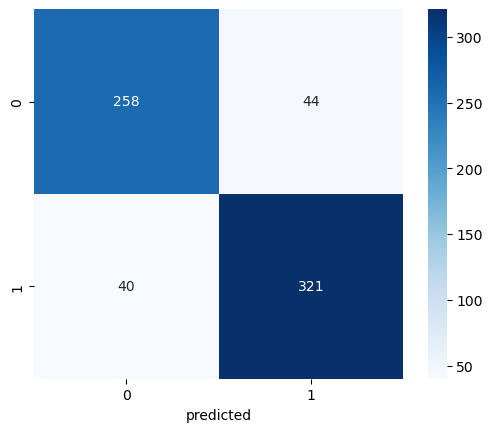

In [215]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=74)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
confusion_plot()

In [216]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    gnb.fit(x_train,y_train)
    pred=gnb.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.7963800904977375 Random state:- 91


accuracy_score:- 0.77526395173454
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       314
           1       0.79      0.79      0.79       349

    accuracy                           0.78       663
   macro avg       0.77      0.77      0.77       663
weighted avg       0.78      0.78      0.78       663



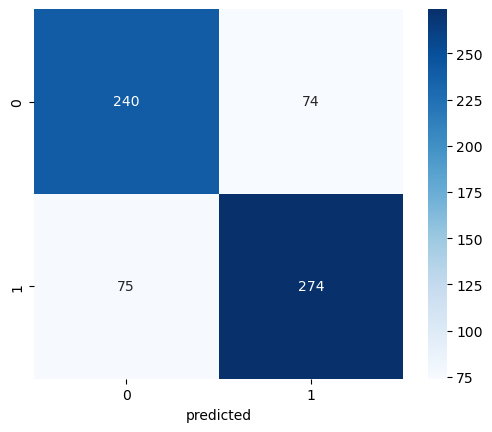

In [217]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=46)
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
confusion_plot()

In [218]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.8355957767722474 Random state:- 87


accuracy_score:- 0.8009049773755657
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       316
           1       0.80      0.83      0.81       347

    accuracy                           0.80       663
   macro avg       0.80      0.80      0.80       663
weighted avg       0.80      0.80      0.80       663



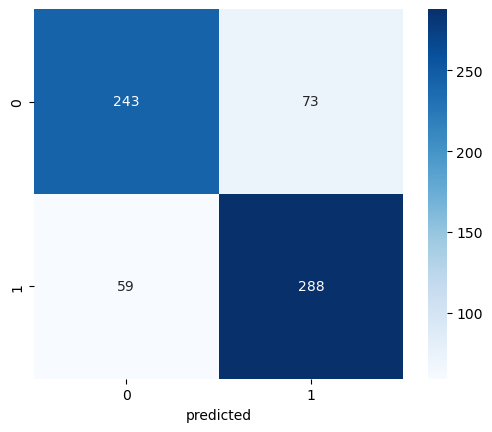

In [219]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=21)
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
confusion_plot()

In [220]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.8929110105580694 Random state:- 41


accuracy_score:- 0.8733031674208145
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       268
           1       0.93      0.86      0.89       395

    accuracy                           0.87       663
   macro avg       0.87      0.88      0.87       663
weighted avg       0.88      0.87      0.87       663



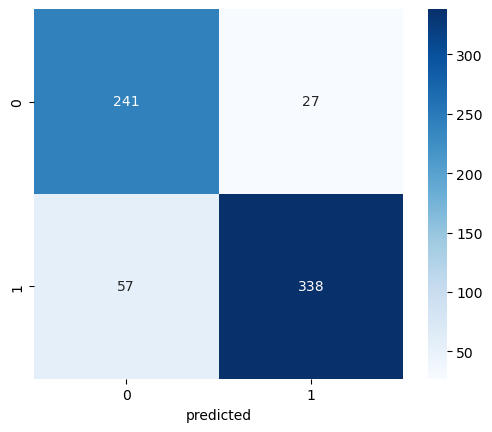

In [221]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=74)
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
confusion_plot()

In [222]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    svc.fit(x_train,y_train)
    pred=svc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.9110105580693816 Random state:- 57


accuracy_score:- 0.8974358974358975
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       315
           1       0.91      0.90      0.90       348

    accuracy                           0.90       663
   macro avg       0.90      0.90      0.90       663
weighted avg       0.90      0.90      0.90       663



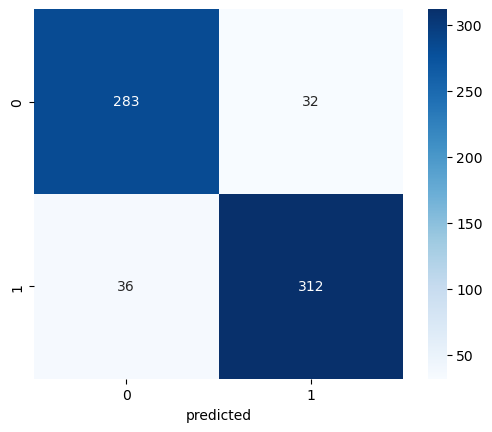

In [223]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=9)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
confusion_plot()

accuracy_score:- 0.9064856711915535
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       310
           1       0.90      0.93      0.91       353

    accuracy                           0.91       663
   macro avg       0.91      0.90      0.91       663
weighted avg       0.91      0.91      0.91       663



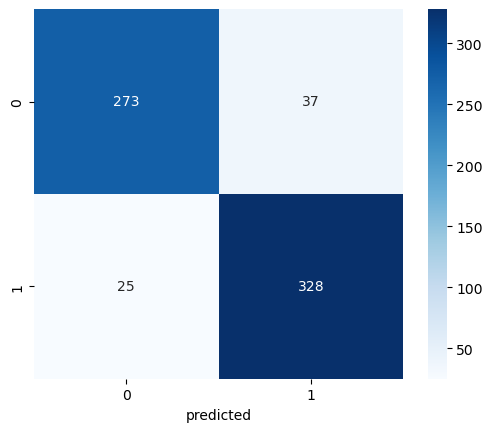

In [224]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=74)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
confusion_plot()

accuracy_score:- 0.9079939668174962
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       305
           1       0.91      0.92      0.92       358

    accuracy                           0.91       663
   macro avg       0.91      0.91      0.91       663
weighted avg       0.91      0.91      0.91       663



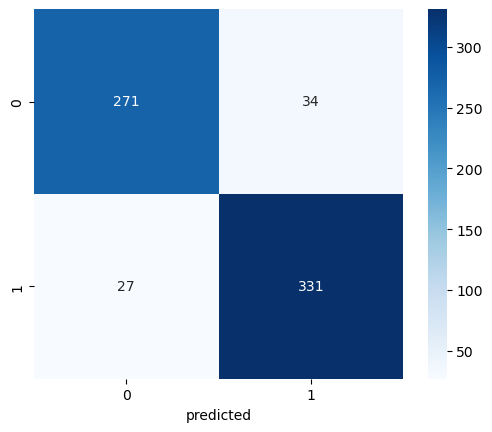

In [225]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=74)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
confusion_plot()

In [226]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    abc.fit(x_train,y_train)
    pred=abc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.8989441930618401 Random state:- 30


accuracy_score:- 0.8627450980392157
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       303
           1       0.88      0.87      0.87       360

    accuracy                           0.86       663
   macro avg       0.86      0.86      0.86       663
weighted avg       0.86      0.86      0.86       663



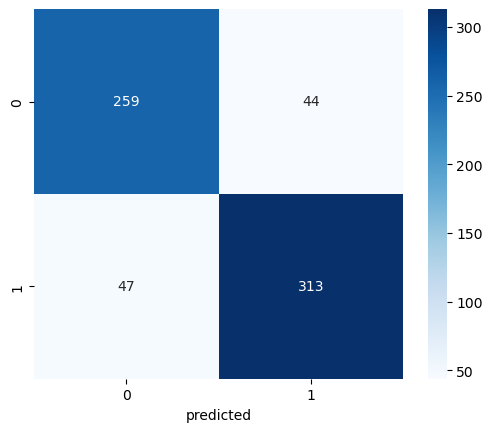

In [227]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=40)
abc.fit(x_train,y_train)
pred=abc.predict(x_test)
confusion_plot()

In [228]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    gbc.fit(x_train,y_train)
    pred=gbc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.918552036199095 Random state:- 62


accuracy_score:- 0.8944193061840121
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       302
           1       0.89      0.92      0.90       361

    accuracy                           0.89       663
   macro avg       0.89      0.89      0.89       663
weighted avg       0.89      0.89      0.89       663



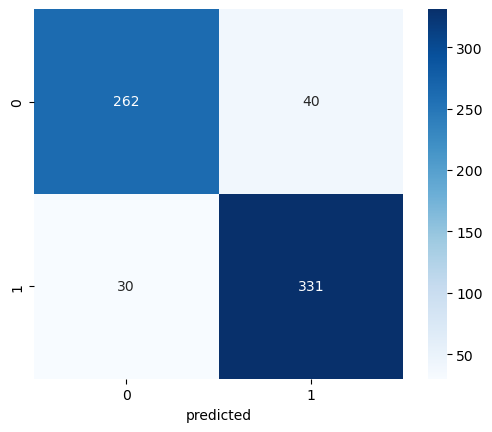

In [229]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=39)
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
confusion_plot()

# Cross Validation

In [230]:
for model in list_model:
    score=cross_val_score(model,x,y,cv=5)
    print(model)
    print(score)
    print(score.mean())

LogisticRegression()
[0.65158371 0.90950226 0.90271493 0.86199095 0.87782805]
0.8407239819004525
GaussianNB()
[0.6719457  0.78054299 0.74208145 0.7918552  0.79864253]
0.7570135746606335
DecisionTreeClassifier()
[0.67873303 0.84615385 0.80542986 0.84841629 0.84162896]
0.8040723981900453
KNeighborsClassifier()
[0.83257919 0.89819005 0.88687783 0.86199095 0.90045249]
0.8760180995475114
SVC()
[0.65384615 0.92533937 0.91176471 0.92533937 0.91855204]
0.8669683257918553
RandomForestClassifier()
[0.73755656 0.95475113 0.93438914 0.93891403 0.94343891]
0.9018099547511313
AdaBoostClassifier()
[0.62217195 0.91855204 0.90950226 0.87782805 0.92081448]
0.8497737556561086
GradientBoostingClassifier()
[0.64253394 0.94343891 0.93891403 0.90497738 0.91402715]
0.8687782805429863


In [231]:
random_forest_params={'max_features': ['auto', 'sqrt', 'log2'],'criterion' :['gini', 'entropy']}

In [232]:
rfc_grid = GridSearchCV(rfc, random_forest_params, cv=5)
rfc_grid.fit(x_train,y_train)
print('Best score:', rfc_grid.best_score_)
print('Best score:', rfc_grid.best_params_)
print('Best score:', rfc_grid.best_estimator_)

Best score: 0.9024282284163274
Best score: {'criterion': 'entropy', 'max_features': 'sqrt'}
Best score: RandomForestClassifier(criterion='entropy', max_features='sqrt')


In [233]:
grid_pred=rfc_grid.predict(x_test)?

SyntaxError: invalid syntax (1295292999.py, line 1)

In [ ]:
def confusion_plot1():
    print('accuracy_score:-',accuracy_score(grid_pred,y_test))
    print(rfc_grid.best_estimator_)
    print(rfc_grid.best_params_)
    print('\nClassification Report')
    print(classification_report(grid_pred,y_test))
    matrix = confusion_matrix(grid_pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
    plt.xlabel("predicted")
    plt.show()

In [ ]:
confusion_plot1()

# ROC Curve

In [ ]:
rfc_pred=rfc_grid.best_estimator_.predict_proba(x_test)

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
n_class=2

In [ ]:
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, rfc_pred[:,i], pos_label=i)

In [ ]:
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC Curve',dpi=300); 

# Save the Model

In [ ]:
import joblib
joblib.dump(rfc_grid.best_estimator_,'HR_Analytics_Project.obj')